In [4]:
#Libraries in Python contain many useful functions needed for data science and
#visualisation. They eliminate the need for writing codes from scratch. 
#In this project we will import several different libraries, to answer our hypothesis.

#The pandas library will add additional data structures, and make out data easier 
#to work with. The primary function we will call on from this library is the
#DataFrame function.
import pandas as pd

#NumPy is an abbreviation for Numeric Python. This library will provide our code
#with arrays and numeric functions, that are easier to work with than those 
#available in the python basic library.
import numpy as np

#The Matplot library will be our primary tools for visualizing data. 
#The Seaborn library is built on top of matplotlib, and will support its basic functions
#as to provide more complex visualizations.
import seaborn as sns
import matplotlib.pyplot as plt

#This function makes sure that we avoid both overfitting, and underfitting our machine
#learning model. The best approach to this is using different sets of data for testing
#and training. As we cannot collect new data, we will in this project split the data.
from sklearn.model_selection import train_test_split

#Label encoding provides us the possibility to make use of names and words in 
#our models, by encoding them with a numeric value.
from sklearn.preprocessing import LabelEncoder

#Our dataset contains multiple dimensions (column and rows). These will be represented in 
#a matrix (list of lists). This is also considered the shape of the dataset. Given the
#multiple dimension of our dataset, it is possible to represent it in a linear function. 
#A linear regression is then used to represent dependencies within our dataset.
from sklearn.linear_model import LinearRegression

In [414]:
#the following code is an overview of the data. 
#The dataset used in this project is called “cereal.csv” and is shown below with the amount of rows and columns as well as the data types the data set consists of.
data = pd.read_csv("cereal.csv")
#data is now being printed
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [408]:
#Check if there are any missing values
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [282]:
#We observed that there are missing values in 'carbo', 'sugars' and 'potass'.
data = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [393]:
#check if there still are missing values 
data.isna().sum().sum()

0

In [401]:
#Does sugar content affect ratings? Sugar content is being compared to ratings, so we can read if there are any correlations. 
#“sugar_df” is a variable we have defined to make this comparison.
sugar_df=data[['sugars','rating',]]
sugar_df

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
3,0,93.704912
5,10,29.509541
...,...,...
72,3,39.106174
73,12,27.753301
74,3,49.787445
75,3,51.592193


In [395]:
#Does protein content affect ratings? Protein content is being compared to ratings so we can read, if there are any correlations. 
#“protein_df” is a variable we have defined to make this comparison.
protein_df=data[['protein','rating',]]
protein_df

,protein,rating
0,4,68.402973
1,3,33.983679
2,4,59.425505
3,4,93.704912
5,2,29.509541
...,...,...
72,2,39.106174
73,1,27.753301
74,3,49.787445
75,3,51.592193


In [283]:
#check how many values there are underneath each manufacturer.
data['mfr'].value_counts()

K    23
G    22
P     9
R     7
Q     7
N     5
A     1
Name: mfr, dtype: int64

In [284]:
#check all cereals with the manufacturer "N".
data.loc[data['mfr'] == "N"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


In [285]:
#Check which cereal that has the lowest rating.
data.loc[data['rating'] == min(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


In [286]:
#Check which cereal that has the highest rating.
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [287]:
#Check the distribution between hot and cold cereals. Print all cereals with the type "H".
print(data['type'].value_counts())
data.loc[data['type'] == "H"]

C    73
H     1
Name: type, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.0,54.850917


[Text(0.5, 1.0, 'Top 20 cereals'),
 Text(0, 0.5, 'Name of cereal'),
 Text(0.5, 0, 'rating of cereal')]

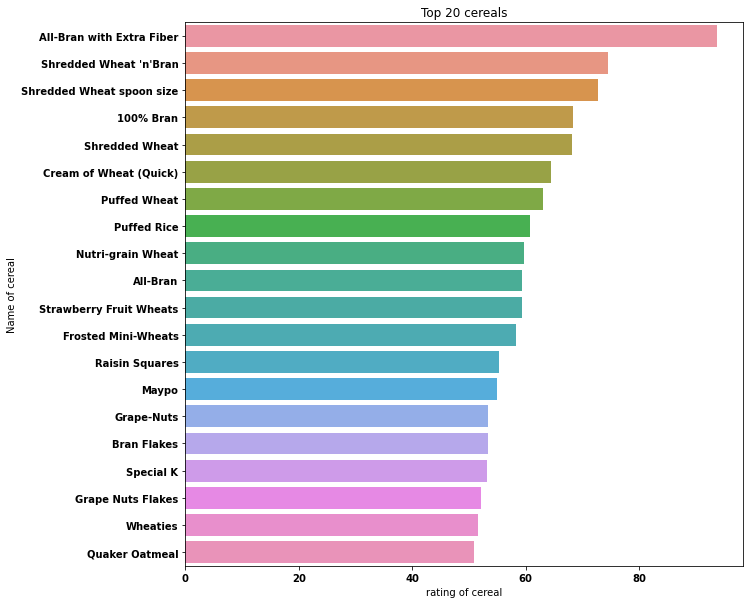

In [472]:
#variable ax is set to seaborn.barplot where the y-axis is set to "name" and the x-axis is set to "rating".
#the data used in this barplot is being sorted, hence the ratings of top 20 products is viewed in descending order.
ax = sns.barplot(y = 'name', x = 'rating', data = data.sort_values('rating', ascending = False)[:20])
#Title is set to be "top 20 cereals" and y-axis is labeled the name of each product and x-axis is labeled their rating.
ax.set(title = 'Top 20 cereals', ylabel = 'Name of cereal', xlabel = 'rating of cereal')

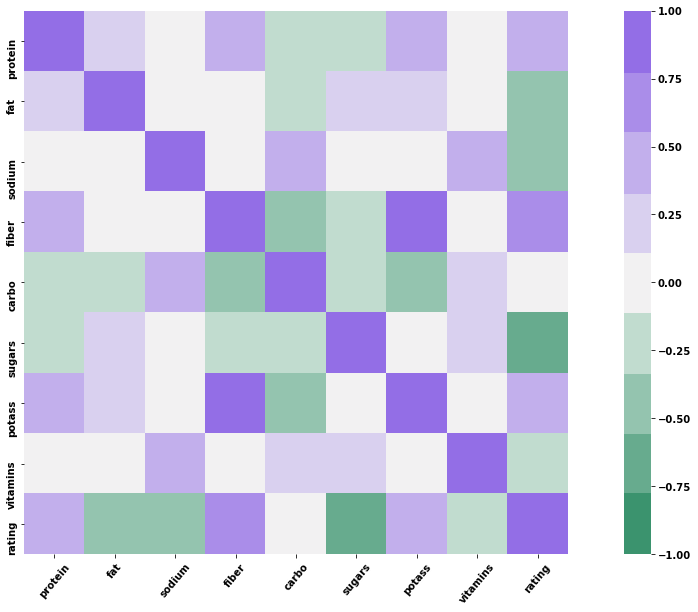

In [409]:
#Below we have defined a variable called “nutrition_df”, which consists of an array of
#data from the dataset including “protein”, “fat”, “sodium”, “fiber”, “carbo”,
#“sugars”, “potass”, “vitamins” and “rating”. 
#Next we have defined the variable “corr” which is used to find correlations between
#all previously mentioned nutrients. Finally the variable “ax” will evoke a heatmap
#varying between the limits -1 and 1 with 0 in the center. “cmap” is the variable
#deciding the color scheme the heatmap will have.
nutrition_df=data[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
#The vaiable corr is defining the visuals of the heatmap. 
corr = nutrition_df.corr()
ax = sns.heatmap(
    corr, 
    
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
    
)
ax.set_xticklabels(
    
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='center'
);

Text(0.5, 1.0, 'Carbs')

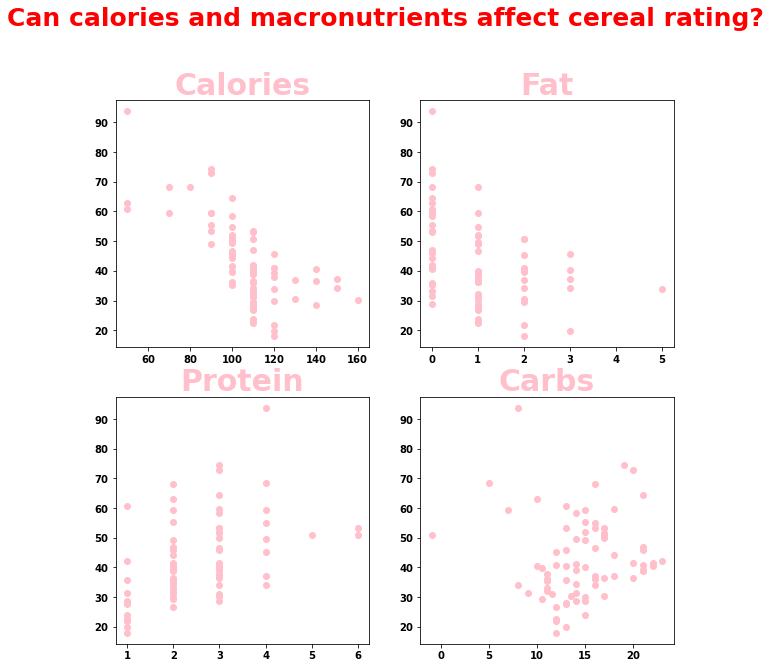

In [476]:
#here we set a variable called "fig" refering to matplotlib pyplot figure.
fig = plt.figure()

#set the figue size to 10 times 10 and set the font to bold.
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

#set title of the visualization to "can calories and macronutrients affect cereal rating?", set font to semibold in size 25
#set color of font to red and position so it fits.
fig.suptitle('Can calories and macronutrients affect cereal rating?', fontsize=25,fontweight="semibold", color="red", position=(0.5,1.01))

#this code refers to the first subplot viewed below. "221" means the plot is places top left.
ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="pink")
ax1.set_title('Calories', fontdict=fontdict, color="pink")

#this code refers to the second subplot viewed below. "222" means the plot is places top right.
ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="pink")
ax2.set_title('Fat', fontdict=fontdict, color="pink")

#this code refers to the third subplot viewed below. "223" means the plot is places bottom left.
ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="pink")
ax3.set_title('Protein', fontdict=fontdict, color="pink")

#this code refers to the fourth subplot viewed below. "224" means the plot is places bottom right.
ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="pink")
ax4.set_title("Carbs", fontdict=fontdict, color="pink")

Text(0.5, 1.0, 'Vitamins')

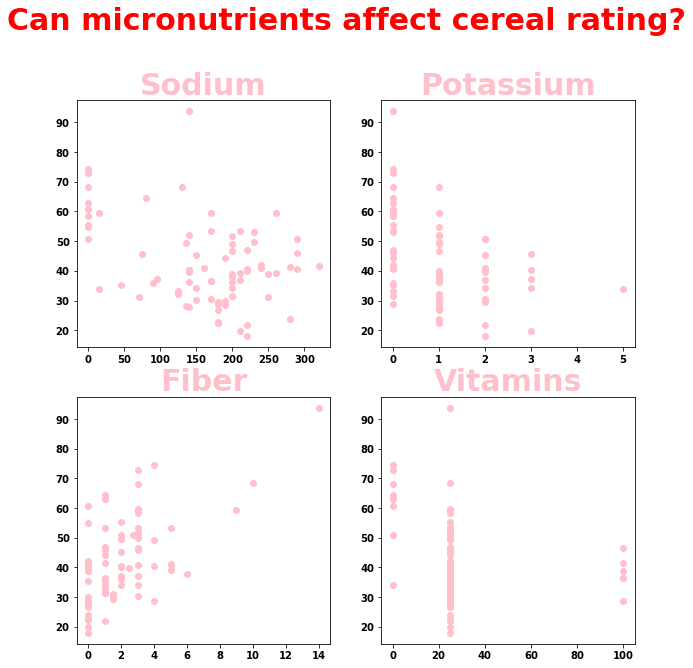

In [478]:
#here we set a variable called "fig" refering to matplotlib pyplot figure.
fig = plt.figure()

#set the figue size to 10 times 10 and set the font to bold.
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

#set title of the visualization to "can calories and macronutrients affect cereal rating?", set font to semibold in size 25
#set color of font to red and position so it fits.
fig.suptitle('Can micronutrients affect cereal rating?', fontsize=30,fontweight="semibold", color="red", position=(0.5,1.01))

#this code refers to the first subplot viewed below. "221" means the plot is places top left.
ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="pink")
ax1.set_title('Sodium', fontdict=fontdict, color="pink")

#this code refers to the second subplot viewed below. "222" means the plot is places top right.
ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="pink")
ax2.set_title('Potassium', fontdict=fontdict, color="pink")

#this code refers to the third subplot viewed below. "223" means the plot is places bottom left.
ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="pink")
ax3.set_title('Fiber', fontdict=fontdict, color="pink")

#this code refers to the fourth subplot viewed below. "224" means the plot is places bottom right.
ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="pink")
ax4.set_title("Vitamins", fontdict=fontdict, color="pink")

Text(0.5, 1.0, 'Cups/serving')

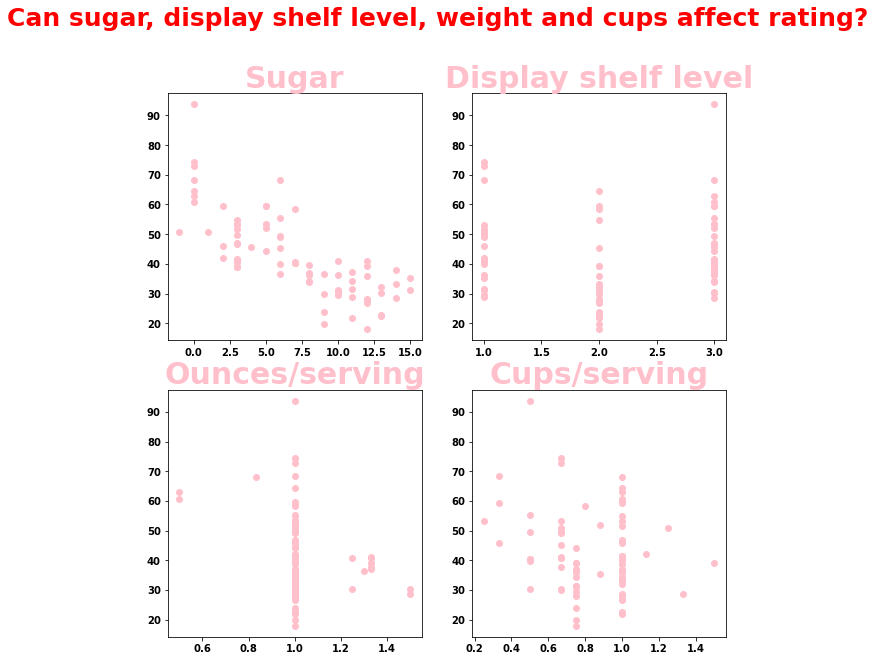

In [464]:
#here we set a variable called "fig" refering to matplotlib pyplot figure.
fig = plt.figure()

#set the figue size to 10 times 10 and set the font to bold.
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

#set title of the visualization to "can calories and macronutrients affect cereal rating?", set font to semibold in size 25
#set color of font to red and position so it fits.
fig.suptitle('Can sugar, display shelf level, weight and cups affect rating?', fontsize=25,fontweight="semibold", color="red", position=(0.5,1))

#this code refers to the first subplot viewed below. "221" means the plot is places top left.
ax1 = fig.add_subplot(221)
ax1.scatter('sugars', 'rating', data= data, c="pink")
ax1.set_title('Sugar', fontdict=fontdict, color="pink")

#this code refers to the second subplot viewed below. "222" means the plot is places top right.
ax2 = fig.add_subplot(222)
ax2.scatter('shelf', 'rating', data=data, c="pink")
ax2.set_title('Display shelf level', fontdict=fontdict, color="pink")

#this code refers to the third subplot viewed below. "223" means the plot is places bottom left.
ax3 = fig.add_subplot(223)
ax3.scatter('weight', 'rating', data=data, c="pink")
ax3.set_title('Ounces/serving', fontdict=fontdict, color="pink")

#this code refers to the fourth subplot viewed below. "224" means the plot is places bottom right.
ax4 = fig.add_subplot(224)
ax4.scatter('cups', 'rating', data=data, c="pink")
ax4.set_title("Cups/serving", fontdict=fontdict, color="pink")

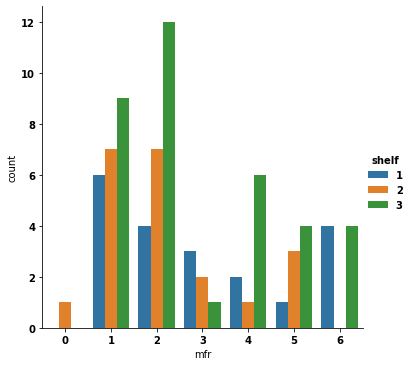

In [452]:
#From seaborn library. This function makes it possible to visualize the
#relationship between numerical and categorical variables.
mfr_shelf=data[['mfr','shelf']]
ax = sns.catplot(x="mfr", kind='count', hue="shelf", data=mfr_shelf)

#ignore warnings.
import warnings
warnings.filterwarnings('ignore')

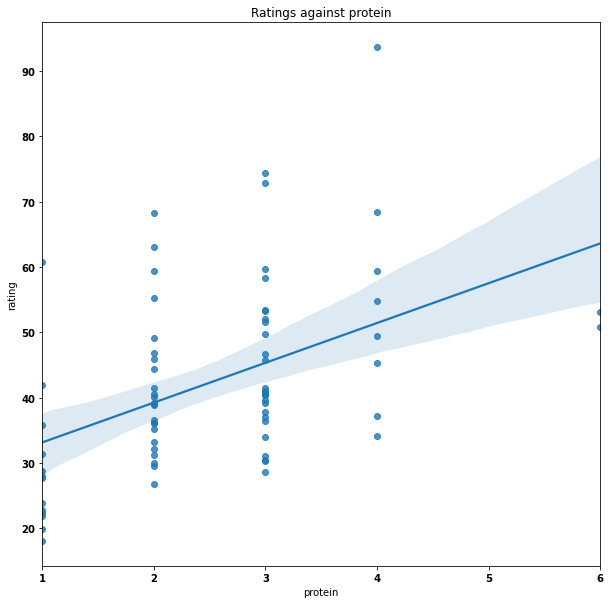

In [458]:
sns.regplot(protein_df['protein'],protein_df['rating']).set_title("Ratings against protein")

#ignore warnings.
import warnings
warnings.filterwarnings('ignore')

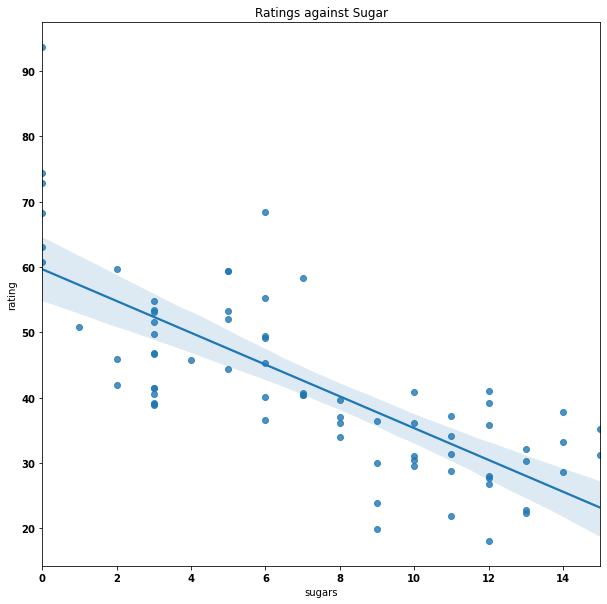

In [454]:
sns.regplot(sugar_df['sugars'],sugar_df['rating']).set_title("Ratings against Sugar")

#ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [455]:
#As mentioned before, label encoding provides us the possibility to make use 
#of names and words in our machine model, by encoding them with a numeric value.
#This is relevant for the following experiment because the value “mrf” is the name of
# the manufacturers that make the cereal. This value should therefore be converted to 
# a form that the machine model can read.
le = LabelEncoder()
 
#Drop_dublicates ensures, that dublicate manufatures will be removed, hence they will be labeled a numerical value. 
#In that way every manufactor be assigned a unique numerical value.
le.fit(data.mfr.drop_duplicates()) 
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates()) 
data.type = le.transform(data.type)

In [456]:
#from sklearn library. This function makes it possible for us to validate our 
#experiment in a smaller test function. In this case will 20% of our data from X and y, 
#be “trained” and “tested” and the outcome of this will be k-1.  The closer to 1 the 
#outcome is, the more valid is our machine model experiment
y = data['rating']
X = data.drop(['rating', 'name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9999999999999996
